## Notebook to make steering muscle figures for ICN 2024 poster

## Imports

In [1]:
import os 
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn.neighbors import KernelDensity
    
from mosquito.process_abf import load_processed_data, detrend_emg
from mosquito.util import set_plot_params, my_adjust_axes, my_add_scalebar
# from mosquito.analyze_bursts import run_spike_detection


## Helper functions

In [28]:
def plot_emg_trace(data, time_range, ax=None, scalebar_size=1, ylim=None,
                   time_units='s', fig_params=None, line_color='k', mic_flag=True):
    """
    Function to take in a data dictionary for a single fly and make
    a zoomed-out plot of the emg trace

    Args:
        - data: dictionary loaded from pickled *_processed.p file
        - time_window: tuple giving the range of data to plot 
            (e.g. (4, 8) will plot between t=4 and t=8 seconds)
        - ax: axis object to plot to
        - scalebar_size: size (duration) of scalebar, in seconds
        - figsize: tuple giving (width, height) of figure in inches 
            (passed to pyplot.subplots)
        - ylim: tuple giving y axis limits. If None, use auto scale
        - time_units: units of time values in data. should be 's'
        - fig_params: dictionary containing plot params; under 
            construction

    Returns:
        - fig, ax
    """
    # read out data from dict
    t = data['time']
    if mic_flag:
        # this is soooooo janky
        emg = data['mic_filt']
    else:
        emg = data['emg_filt']
    # emg = detrend_emg(emg)

    # plot params
    # TODO: move this to params dictionary
    linewidth = 0.5 
    scalebar_linewidth = 3.5  # 1.5
    color = line_color
    
    # initialize figure (if needed)
    if ax is None:
        fig, ax = plt.subplots()

    # restrict time domain to time_range
    mask = (t >= time_range[0]) & (t <= time_range[-1])

    emg_curr = emg[mask]
    t_curr = t[mask]
    
    # plot. Note that we're subtracting off the initial time so it always
    # starts at t=0
    ax.plot(t_curr - time_range[0],
             emg_curr,
             color=color,
             lw=linewidth)

    # -----------------------------------------
    # axis properties
    # restrict x range
    ax.set_xlim([0, time_range[1] - time_range[0]])

    # restrict y range?
    if ylim is not None:
        ax.set_ylim(ylim)
        
    if scalebar_size == 0:
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        
    else:
        if scalebar_size < 1:
            units = 'ms'
            label_mult = 1000
        else:
            units = 's'
            label_mult = 1
            
        ax = my_add_scalebar(ax, (0, scalebar_size), linewidth=scalebar_linewidth, 
                             spine='bottom', units=units, ticklength=0, 
                             offset_length=10, label_mult_factor=label_mult)
    
    # remove other axis lines
    for spine in ['right', 'top', 'left']:
        ax.spines[spine].set_visible(False)

    # remove y ticks
    ax.set_yticks([])
    
    return ax


In [19]:
def make_trace_figure(data_folder, axo_num, time_range, scalebar_size=1, figsize=(2,4), save_flag=False, 
                      save_str='', save_ext='.svg', ylim=None, line_color='k', mic_flag=False, time_units='s'):
    """
    Wrapper to make emg trace figure
    """
    # load data
    data = load_processed_data(data_folder, axo_num)
    
    # make figure
    fig, ax = plt.subplots(figsize=figsize)
    ax = plot_emg_trace(data, time_range, ax=ax, scalebar_size=scalebar_size, ylim=ylim, line_color=line_color, 
                        mic_flag=mic_flag, time_units=time_units)
    
    # save?
    if save_flag:
        # make the filename of the figure reflect which data file it's from
        save_filename = f'{save_str}_{data_folder}_{axo_num:02d}{save_ext}'
    
        # save
        fig.savefig(os.path.join(save_path, save_filename), dpi=save_dpi, bbox_inches='tight')

    return fig, ax
    

## Params

In [4]:
# PLOT PARAMETERS
plot_type = 'poster'  # 'paper' or 'powerpoint' or 'poster
plot_params = set_plot_params(plot_type=plot_type)


In [6]:
# SAVE INFO
# where to save figures?
save_path = '/media/sam/SamData/Dropbox/Conferences/ICN 2024/poster/figs'
trace_save_str = 'steering_trace'  # header for filenames of trace plots
waveform_save_str = 'steering_waveform'  # header for filenames of wavefor plots

# should we save plots?
save_trace_flag = True # if True, save the example emg trace plot; if False, don't
save_waveform_flag = True  # if True, save the example emg waveform plot; if False, don't

# how should figures be saved? (resolution, file format, etc)
save_dpi = 500 
save_ext_trace = '.svg'  # '.png'
save_ext_waveform = '.svg'  # '.png'

In [40]:
# params for trace plots
trace_scalebar_size = 0.01 
trace_figsize = (6, 0.5)  # (6, 1.5) # (8, 2)

waveform_scalebar_size = 0.02 
waveform_figsize = (1.16*3, 1.16*2)

In [44]:
# EXAMPLE DATA INFO
# define identifying info for which data files we'll use here (can also do case by case basis)
mosquito_female_folder = 39
mosquito_female_axo = 4
mosquito_female_ylim = None  # (-0.2569732666015625, 2.0193634033203125)
mosquito_female_color = '#004488'

mosquito_female_folder2 = 40
mosquito_female_axo2 = 8

# mosquito_male_folder = 37
# mosquito_male_axo = 3 
# mosquito_male_ylim = (-0.5, 3.05)  # (-0.4506072998046875, 2.9771575927734375)
# mosquito_male_color = '#BB5566'

drosophila_folder = 36
drosophila_axo = 5
drosophila_ylim = None  # (-0.35, 4.75)  # (-0.33963775634765625, 4.621406555175781)
drosophila_color = '#555555'  # '#DDAA33'

## Make plots of traces + mic signal

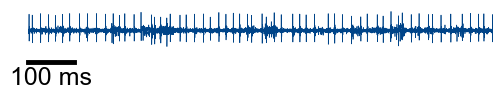

In [56]:
# first need to play around with this a bit
data_folder = mosquito_female_folder
axo_num = mosquito_female_axo
time_range = (55.2, 56.2)  #  (5.65, 6.65) # (0.12, 0.2)

# plot
fig, ax = make_trace_figure(data_folder, axo_num, time_range, 
                            scalebar_size=10*trace_scalebar_size,  # trace_scalebar_size, 
                            figsize=trace_figsize, 
                            save_flag=save_trace_flag, 
                            save_str=trace_save_str + '_zoomed_out', 
                            save_ext=save_ext_trace, 
                            ylim=mosquito_female_ylim,
                           line_color=mosquito_female_color)


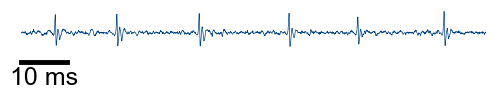

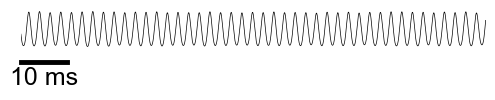

In [62]:
# first need to play around with this a bit
data_folder = mosquito_female_folder
axo_num = mosquito_female_axo
time_range = (55.52, 55.62)  #  (5.65, 6.65) # (0.12, 0.2)

# plot
fig, ax = make_trace_figure(data_folder, axo_num, time_range, 
                            scalebar_size=trace_scalebar_size,  # trace_scalebar_size, 
                            figsize=trace_figsize, 
                            save_flag=save_trace_flag, 
                            save_str=trace_save_str, 
                            save_ext=save_ext_trace, 
                            ylim=mosquito_female_ylim,
                           line_color=mosquito_female_color)

fig, ax = make_trace_figure(data_folder, axo_num, time_range, 
                            scalebar_size=trace_scalebar_size, 
                            figsize=trace_figsize, 
                            save_flag=save_trace_flag, 
                            save_str=trace_save_str + '_mic', 
                            save_ext=save_ext_trace, 
                            ylim=mosquito_female_ylim,
                           line_color='k',
                           mic_flag=True)

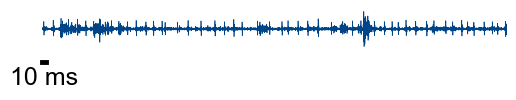

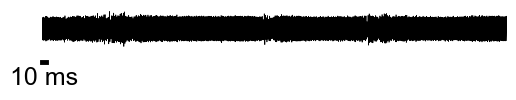

In [46]:
# first need to play around with this a bit
data_folder = mosquito_female_folder2
axo_num = mosquito_female_axo2
time_range = (10, 11)

# plot
fig, ax = make_trace_figure(data_folder, axo_num, time_range, 
                            scalebar_size=trace_scalebar_size,  # trace_scalebar_size, 
                            figsize=trace_figsize, 
                            save_flag=save_trace_flag, 
                            save_str=trace_save_str, 
                            save_ext=save_ext_trace, 
                            ylim=mosquito_female_ylim,
                           line_color=mosquito_female_color)

fig, ax = make_trace_figure(data_folder, axo_num, time_range, 
                            scalebar_size=trace_scalebar_size, 
                            figsize=trace_figsize, 
                            save_flag=save_trace_flag, 
                            save_str=trace_save_str + '_mic', 
                            save_ext=save_ext_trace, 
                            ylim=mosquito_female_ylim,
                           line_color='k',
                           mic_flag=True)

In [32]:
trace_scalebar_size

2

## For phase histogram, using the b1_phase_analysis notebook